In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn import metrics
import random
random.seed(1)

In [2]:
Train_data = pd.read_csv('./train.csv', sep=',')
Test_data = pd.read_csv('./test.csv', sep=',')

# EDA

In [3]:
Train_data.shape

(2000, 14)

In [4]:
# Test_data.head().append(Test_data.tail())

In [5]:
Test_data.shape

(1000, 13)

In [26]:
Train_data.head().append(Train_data.tail())

,ID,DEFAULT,AGE,ACADMOS,ADEPCNT,MAJORDRG,MINORDRG,OWNRENT,INCOME,SELFEMPL,INCPER,EXP_INC,SPENDING,LOGSPEND
0,0,0,37.583332,6,0,0,0,1,2916.666667,1,39000.000000,0.116674,340.300227,5.829828
1,1,1,23.750000,6,0,1,0,1,8333.250000,0,99999.000000,0.043130,359.416667,5.884482
2,2,0,47.833332,96,1,0,1,1,3333.333333,0,20000.000000,0.051814,172.715001,5.151643
3,3,0,22.916666,4,0,0,0,0,2100.000000,0,25200.000000,0.035337,74.208336,4.306877
4,4,0,24.000000,64,0,0,0,0,1541.666667,0,18500.000000,0.168817,260.259172,5.561678
1995,1995,0,20.666666,146,0,0,0,0,1166.666667,0,15000.000000,0.007400,8.633333,2.155631
1996,1996,1,35.000000,144,3,0,0,1,2916.666667,0,11250.000000,0.010222,29.814816,3.395005
1997,1997,0,22.000000,12,0,0,0,0,2000.000000,0,24000.000000,0.070900,141.799167,4.954412
1998,1998,1,23.666666,14,2,0,0,0,1166.666667,0,7666.666504,0.007782,9.078696,2.205931
1999,1999,0,26.583334,37,0,0,0,1,2625.000000,0,61500.000000,0.028029,73.575974,4.298318


In [27]:
Train_data.columns

Index(['ID', 'DEFAULT', 'AGE', 'ACADMOS', 'ADEPCNT', 'MAJORDRG', 'MINORDRG',
       'OWNRENT', 'INCOME', 'SELFEMPL', 'INCPER', 'EXP_INC', 'SPENDING',
       'LOGSPEND '],
      dtype='object')

- DEFAULT - 1 if defaulted 0 if not
- AGE - Age in years plus twelfths of a year
- ACADMOS - months living at current address
- ADEPCNT - 1 + number of dependents
- MAJORDRG - Number of major derogatory reports
- MINORDRG - Number of minor derogatory reports
- OWNRENT - 1 if owns their home, 0 if rent
- INCOME - Monthly income (divided by 10,000)
- SELFEMPL - 1 if self employed, 0 if not
- INCPER - Income divided by number of dependents
- EXP_INC - Ratio of monthly credit card expenditure to yearly income
- SPENDING - Average monthly credit card expenditure
- LOGSPEND - Log of spending

Numerical
- Age
- Acadmos
- Adepcnt
- Majordrg
- Minordrg
- Income
- Incper
- Exp_inc
- Spending
- Logspend

Categorical
- Ownrent
- Selfempl

In [211]:
Train_data.describe()

,ID,DEFAULT,AGE,ACADMOS,ADEPCNT,MAJORDRG,MINORDRG,OWNRENT,INCOME,SELFEMPL,INCPER,EXP_INC,SPENDING,LOGSPEND
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,0.328000,33.622958,57.630500,1.001000,0.154000,0.244500,0.473000,2501.517500,0.049000,21846.772510,0.088297,208.970127,4.589646
std,577.494589,0.469602,10.535333,64.796692,1.239261,0.476862,0.642593,0.499395,1269.471783,0.215922,13957.762399,0.106420,258.614802,1.497231
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,208.333333,0.000000,3720.000000,0.000160,0.181818,-1.704748
25%,499.750000,0.000000,25.416666,12.000000,0.000000,0.000000,0.000000,0.000000,1666.666667,0.000000,12250.000000,0.022742,49.380612,3.899558
50%,999.500000,0.000000,31.333334,33.000000,1.000000,0.000000,0.000000,0.000000,2166.666667,0.000000,18953.000000,0.055605,126.855214,4.843044
75%,1499.250000,1.000000,40.250000,73.250000,2.000000,0.000000,0.000000,1.000000,2916.666667,0.000000,27312.500000,0.113409,268.454708,5.592682
max,1999.000000,1.000000,86.833336,511.000000,6.000000,5.000000,7.000000,1.000000,8333.250000,1.000000,110000.000000,1.147261,2804.971003,7.939148


In [70]:
# Data types
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         2000 non-null   int64  
 1   DEFAULT    2000 non-null   int64  
 2   AGE        2000 non-null   float64
 3   ACADMOS    2000 non-null   int64  
 4   ADEPCNT    2000 non-null   int64  
 5   MAJORDRG   2000 non-null   int64  
 6   MINORDRG   2000 non-null   int64  
 7   OWNRENT    2000 non-null   int64  
 8   INCOME     2000 non-null   float64
 9   SELFEMPL   2000 non-null   int64  
 10  INCPER     2000 non-null   float64
 11  EXP_INC    2000 non-null   float64
 12  SPENDING   2000 non-null   float64
 13  LOGSPEND   2000 non-null   float64
dtypes: float64(6), int64(8)
memory usage: 218.9 KB


In [71]:
# Numerical features with few unique values
print( Train_data["ADEPCNT"].value_counts() ) 
print( Train_data["MAJORDRG"].value_counts() ) 
print( Train_data["MINORDRG"].value_counts() ) 

0    997
1    407
2    304
3    201
4     74
5     14
6      3
Name: ADEPCNT, dtype: int64
0    1768
1     171
2      51
3       6
4       3
5       1
Name: MAJORDRG, dtype: int64
0    1661
1     242
2      61
3      24
4       9
5       2
7       1
Name: MINORDRG, dtype: int64


In [72]:
# Distribution of categorical features
print( Train_data["OWNRENT"].value_counts() ) 
print( Train_data["SELFEMPL"].value_counts() ) 

0    1054
1     946
Name: OWNRENT, dtype: int64
0    1902
1      98
Name: SELFEMPL, dtype: int64


In [73]:
# imbalanced target values
Train_data['DEFAULT'].value_counts()

0    1344
1     656
Name: DEFAULT, dtype: int64

In [74]:
# numerical feature with a long tail
print(Train_data['AGE'].value_counts())

24.833334    17
26.000000    14
23.750000    13
24.250000    13
23.916666    13
             ..
53.916668     1
82.583336     1
18.750000     1
18.166666     1
64.416664     1
Name: AGE, Length: 476, dtype: int64


In [13]:
Train_data.isnull().sum()
Test_data.isnull().sum()

ID           0
AGE          0
ACADMOS      0
ADEPCNT      0
MAJORDRG     0
MINORDRG     0
OWNRENT      0
INCOME       0
SELFEMPL     0
INCPER       0
EXP_INC      0
SPENDING     0
LOGSPEND     0
dtype: int64

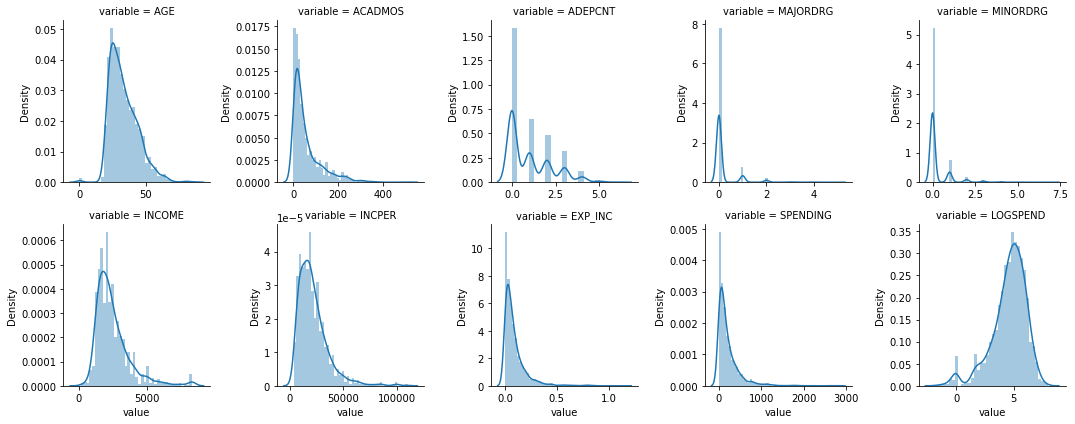

In [7]:
numeric_features = ['AGE', 'ACADMOS', 'ADEPCNT', 'MAJORDRG', 'MINORDRG', 'INCOME', 'INCPER', 'EXP_INC', 'SPENDING', 'LOGSPEND ']

f = pd.melt(Train_data, value_vars=numeric_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=5, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

<AxesSubplot:>

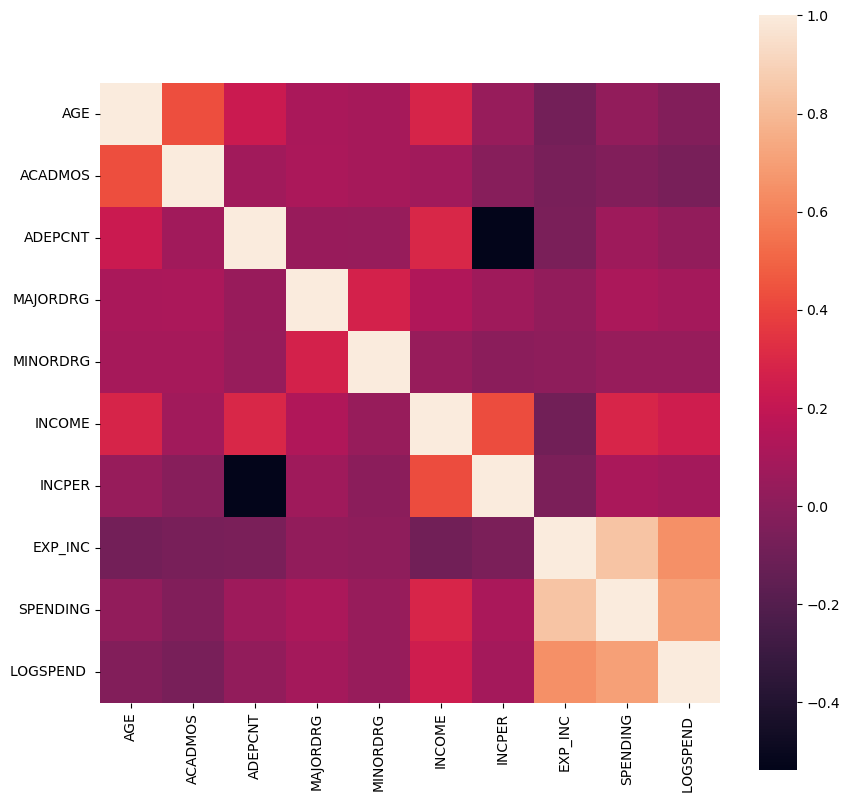

In [16]:
data_numeric = Train_data[numeric_features]
correlation = data_numeric.corr()

f , ax = plt.subplots(figsize = (10, 10), dpi = 100)

sns.heatmap(correlation,square = True,  vmax=1)

In [12]:
correlation

,AGE,ACADMOS,ADEPCNT,MAJORDRG,MINORDRG,INCOME,INCPER,EXP_INC,SPENDING,LOGSPEND
AGE,1.000000,0.431475,0.227078,0.108922,0.098157,0.281051,0.042183,-0.087680,0.026114,-0.032108
ACADMOS,0.431475,1.000000,0.076431,0.112046,0.097156,0.076264,-0.011365,-0.069050,-0.036683,-0.064314
ADEPCNT,0.227078,0.076431,1.000000,0.049683,0.040525,0.292719,-0.538530,-0.060226,0.062604,0.020824
MAJORDRG,0.108922,0.112046,0.049683,1.000000,0.272131,0.131939,0.074467,0.023274,0.114296,0.089002
MINORDRG,0.098157,0.097156,0.040525,0.272131,1.000000,0.040698,-0.000907,0.010498,0.038613,0.043054
INCOME,0.281051,0.076264,0.292719,0.131939,0.040698,1.000000,0.423868,-0.088176,0.285108,0.248499
INCPER,0.042183,-0.011365,-0.538530,0.074467,-0.000907,0.423868,1.000000,-0.054568,0.106606,0.091482
EXP_INC,-0.087680,-0.069050,-0.060226,0.023274,0.010498,-0.088176,-0.054568,1.000000,0.840355,0.650164
SPENDING,0.026114,-0.036683,0.062604,0.114296,0.038613,0.285108,0.106606,0.840355,1.000000,0.701623
LOGSPEND,-0.032108,-0.064314,0.020824,0.089002,0.043054,0.248499,0.091482,0.650164,0.701623,1.000000


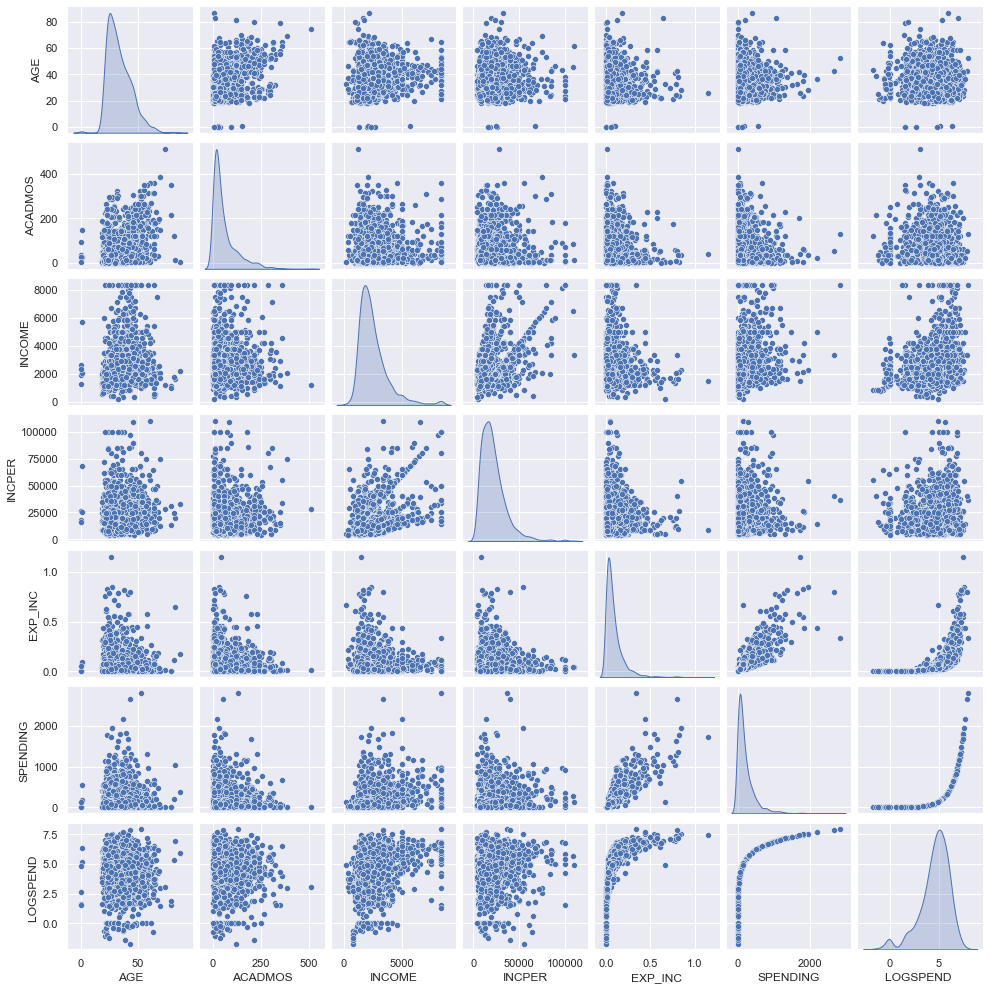

In [24]:
sns.set()
columns = ['AGE', 'ACADMOS', 'INCOME', 'INCPER', 'EXP_INC', 'SPENDING', 'LOGSPEND ']
sns.pairplot(Train_data[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

# Feature Engineering

## Drop unnecessary features

In [12]:
y = Train_data['DEFAULT']
X = Train_data.drop(['ID','DEFAULT','SPENDING'], axis=1)

# n = 2000
# ntest = 500
# resultList=random.sample(range(0,n),ntest)

# X_train = X.copy()
# X_train.drop(index = resultList)
# X_test = X.iloc[resultList,:]

# y_train = y.copy()
# y_train.drop(index = resultList)
# y_test = y[resultList]

## Train_test_split

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## Transformation

In [14]:
LOG_AGE = np.log(X_train['AGE'])
LOG_AGE[np.isinf(LOG_AGE)] = np.nan
LOG_AGE = LOG_AGE.mask(LOG_AGE<0, np.mean(LOG_AGE))
# LOG_AGE = LOG_AGE.replace(-inf, np.mean(LOG_AGE))
LOG_AGE[np.isnan(LOG_AGE)] = np.mean(LOG_AGE)

# 'ACADMOS', 'INCOME', 'INCPER', 'EXP_INC'

LOG_ACADMOS = np.log(X_train['ACADMOS'])
LOG_ACADMOS[np.isinf(LOG_ACADMOS)] = np.nan
LOG_ACADMOS = LOG_ACADMOS.mask(LOG_ACADMOS<0, np.mean(LOG_ACADMOS))
# LOG_AGE = LOG_AGE.replace(-inf, np.mean(LOG_AGE))
LOG_ACADMOS[np.isnan(LOG_ACADMOS)] = np.mean(LOG_ACADMOS)

LOG_INCOME = np.log(X_train['INCOME'])
LOG_INCOME[np.isinf(LOG_INCOME)] = np.nan
LOG_INCOME = LOG_INCOME.mask(LOG_INCOME<0, np.mean(LOG_INCOME))
# LOG_AGE = LOG_AGE.replace(-inf, np.mean(LOG_AGE))
LOG_INCOME[np.isnan(LOG_INCOME)] = np.mean(LOG_INCOME)

LOG_INCPER = np.log(X_train['INCPER'])
LOG_INCPER[np.isinf(LOG_INCPER)] = np.nan
LOG_INCPER = LOG_INCPER.mask(LOG_INCPER<0, np.mean(LOG_INCPER))
# LOG_AGE = LOG_AGE.replace(-inf, np.mean(LOG_AGE))
LOG_INCPER[np.isnan(LOG_INCPER)] = np.mean(LOG_INCPER)

LOG_EXP_INC = np.log(X_train['EXP_INC'])
LOG_EXP_INC[np.isinf(LOG_EXP_INC)] = np.nan
LOG_EXP_INC = LOG_EXP_INC.mask(LOG_EXP_INC<0, np.mean(LOG_EXP_INC))
# LOG_AGE = LOG_AGE.replace(-inf, np.mean(LOG_AGE))
LOG_EXP_INC[np.isnan(LOG_EXP_INC)] = np.mean(LOG_EXP_INC)

In [15]:
X_train['LOG_AGE'] = LOG_AGE
X_train['LOG_ACADMOS'] = LOG_ACADMOS
X_train['LOG_INCOME'] = LOG_INCOME
X_train['LOG_INCPER'] = LOG_INCPER
X_train['LOG_EXP_INC'] = LOG_EXP_INC

X_train = X_train.drop(['AGE','ACADMOS', 'INCOME', 'INCPER', 'EXP_INC'], axis=1)

In [16]:
LOG_AGE = np.log(X_test['AGE'])
LOG_AGE[np.isinf(LOG_AGE)] = np.nan
LOG_AGE = LOG_AGE.mask(LOG_AGE<0, np.mean(LOG_AGE))
# LOG_AGE = LOG_AGE.replace(-inf, np.mean(LOG_AGE))
LOG_AGE[np.isnan(LOG_AGE)] = np.mean(LOG_AGE)

# 'ACADMOS', 'INCOME', 'INCPER', 'EXP_INC'

LOG_ACADMOS = np.log(X_test['ACADMOS'])
LOG_ACADMOS[np.isinf(LOG_ACADMOS)] = np.nan
LOG_ACADMOS = LOG_ACADMOS.mask(LOG_ACADMOS<0, np.mean(LOG_ACADMOS))
# LOG_AGE = LOG_AGE.replace(-inf, np.mean(LOG_AGE))
LOG_ACADMOS[np.isnan(LOG_ACADMOS)] = np.mean(LOG_ACADMOS)

LOG_INCOME = np.log(X_test['INCOME'])
LOG_INCOME[np.isinf(LOG_INCOME)] = np.nan
LOG_INCOME = LOG_INCOME.mask(LOG_INCOME<0, np.mean(LOG_INCOME))
# LOG_AGE = LOG_AGE.replace(-inf, np.mean(LOG_AGE))
LOG_INCOME[np.isnan(LOG_INCOME)] = np.mean(LOG_INCOME)

LOG_INCPER = np.log(X_test['INCPER'])
LOG_INCPER[np.isinf(LOG_INCPER)] = np.nan
LOG_INCPER = LOG_INCPER.mask(LOG_INCPER<0, np.mean(LOG_INCPER))
# LOG_AGE = LOG_AGE.replace(-inf, np.mean(LOG_AGE))
LOG_INCPER[np.isnan(LOG_INCPER)] = np.mean(LOG_INCPER)

LOG_EXP_INC = np.log(X_test['EXP_INC'])
LOG_EXP_INC[np.isinf(LOG_EXP_INC)] = np.nan
LOG_EXP_INC = LOG_EXP_INC.mask(LOG_EXP_INC<0, np.mean(LOG_EXP_INC))
# LOG_AGE = LOG_AGE.replace(-inf, np.mean(LOG_AGE))
LOG_EXP_INC[np.isnan(LOG_EXP_INC)] = np.mean(LOG_EXP_INC)

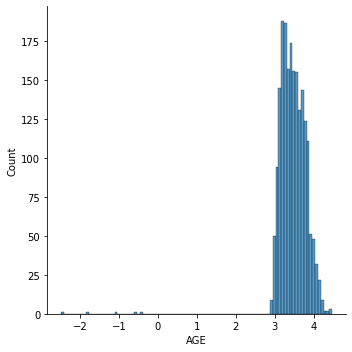

In [17]:
sns.displot(np.log(X['AGE']))

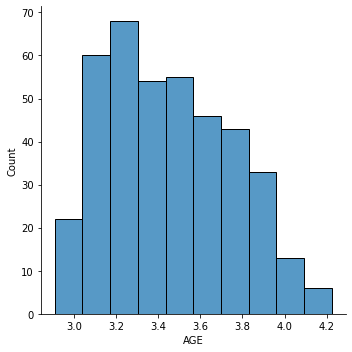

In [18]:
sns.displot(LOG_AGE)

In [19]:
X_test['LOG_AGE'] = LOG_AGE
X_test['LOG_ACADMOS'] = LOG_ACADMOS
X_test['LOG_INCOME'] = LOG_INCOME
X_test['LOG_INCPER'] = LOG_INCPER
X_test['LOG_EXP_INC'] = LOG_EXP_INC

X_test = X_test.drop(['AGE','ACADMOS', 'INCOME', 'INCPER', 'EXP_INC'], axis=1)

In [20]:
from sklearn import preprocessing
mm = preprocessing.MinMaxScaler()
X_train = mm.fit_transform(X_train)
mm = preprocessing.MinMaxScaler()
X_test = mm.fit_transform(X_test)

In [21]:
# from sklearn import preprocessing
# std_slc = preprocessing.StandardScaler()
# X = std_slc.fit_transform(X)

## Processing the Imbalanced data

In [22]:
from imblearn.over_sampling import RandomOverSampler
rus = RandomOverSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [23]:
# from imblearn.over_sampling import ADASYN
# adasyn = ADASYN(random_state=0)
# X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

## Decomposition

I did not use the decomposition technique in this case, because the data size and dimension of features are not large

In [24]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=None, copy=True, whiten=False)
# X_resampled = pca.fit_transform(X_resampled)

# Model: Logistic

In [103]:
from sklearn.linear_model import LogisticRegression
# define log
clf = LogisticRegression(max_iter=100)

clf.fit(X_resampled, y_resampled)

train_predict = clf.predict(X_resampled)
test_predict = clf.predict(X_test)

print('The f1 of the Logistic Regression for Traning Set is: %f' % metrics.f1_score(y_resampled,train_predict))
print('The f1 of the Logistic Regression for Validation Set is: %f' % metrics.f1_score(y_test,test_predict))

The f1 of the Logistic Regression for Traning Set is: 0.620404
The f1 of the Logistic Regression for Validation Set is: 0.503856


In [104]:
from sklearn.model_selection import GridSearchCV

## search area
C = np.logspace(-4, 4, 50)
penalty = ['l1', 'l2']

parameters = { 'C': C,
              'penalty': penalty}
model = LogisticRegression(max_iter=100)

## grid search
clf = GridSearchCV(model, parameters, cv=3, scoring='f1_macro',verbose=1,n_jobs=-1)
clf = clf.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [105]:
clf.best_params_

{'C': 159.98587196060572, 'penalty': 'l2'}

In [106]:
clf.best_score_

0.5483164368198491

In [107]:
from sklearn.linear_model import LogisticRegression
# define log
clf = LogisticRegression(max_iter=100,C=C[38],penalty='l2')

clf.fit(X_resampled, y_resampled)

train_predict = clf.predict(X_resampled)
test_predict = clf.predict(X_test)

print('The f1 of the Logistic Regression for Traning Set is: %f' % metrics.f1_score(y_resampled,train_predict))
print('The f1 of the Logistic Regression for Validation Set is: %f' % metrics.f1_score(y_test,test_predict))

The f1 of the Logistic Regression for Traning Set is: 0.626484
The f1 of the Logistic Regression for Validation Set is: 0.500000


# Model: GBDT

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(loss='deviance', learning_rate=0.01, n_estimators=100, subsample=0.8
                                  , min_samples_split=2, min_samples_leaf=1, max_depth=3
                                  , init=None, random_state=None, max_features=None
                                  , verbose=0, max_leaf_nodes=None, warm_start=False
                                  )

clf.fit(X_resampled, y_resampled)

train_predict = clf.predict(X_resampled)
test_predict = clf.predict(X_test)

print('The f1 of the GBDT for Traning Set is: %f' % metrics.f1_score(y_resampled,train_predict))
print('The f1 of the GBDT for Validation Set is: %f' % metrics.f1_score(y_test,test_predict))

The f1 of the GBDT for Traning Set is: 0.644327
The f1 of the GBDT for Validation Set is: 0.489899


# Model: SVM

In [65]:
from sklearn.svm import SVC

clf = SVC()
# SVM on the train set
clf.fit(X_resampled, y_resampled)

train_predict = clf.predict(X_resampled)
test_predict = clf.predict(X_test)

print('The f1 of the SVM for Traning Set is: %f' % metrics.f1_score(y_resampled,train_predict,average='macro'))
print('The f1 of the SVM for Validation Set is: %f' % metrics.f1_score(y_test,test_predict,average='macro'))

The f1 of the SVM for Traning Set is: 0.630232
The f1 of the SVM for Validation Set is: 0.512473


In [64]:
from sklearn.model_selection import GridSearchCV

## search area
C = [0.1, 1, 10, 100, 1000]
gamma = [1, 0.1, 0.01, 0.001, 0.0001]
kernel = ['rbf']

parameters = { 'C': C,
              'gamma': gamma,
              'kernel':kernel}
model = SVC()

## grid search
clf = GridSearchCV(model, parameters, cv=3, scoring='f1',verbose=1,n_jobs=-1)
clf = clf.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


In [20]:
clf.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

In [21]:
clf.best_score_

0.30268845545598305

In [69]:
clf = SVC(C=1000, gamma=1, kernel= 'rbf')
# SVM on the train set
clf.fit(X_resampled, y_resampled)

train_predict = clf.predict(X_resampled)
test_predict = clf.predict(X_test)

print('The f1 of the SVM for Traning Set is: %f' % metrics.f1_score(y_resampled,train_predict))
print('The f1 of the SVM for Validation Set is: %f' % metrics.f1_score(y_test,test_predict))

The f1 of the SVM for Traning Set is: 0.788665
The f1 of the SVM for Validation Set is: 0.520231


# Model: XGBOOST

In [62]:
from xgboost.sklearn import XGBClassifier
## define XGB
clf = XGBClassifier()
# XGBOOST on the train set
clf.fit(X_resampled, y_resampled)

train_predict = clf.predict(X_resampled)
test_predict = clf.predict(X_test)

print('The f1 of the XGBOOST for Traning Set is: %f' % metrics.f1_score(y_resampled,train_predict))
print('The f1 of the XGBOOST for Validation Set is: %f' % metrics.f1_score(y_test,test_predict))

[20:27:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The f1 of the XGBOOST for Traning Set is: 0.997682
The f1 of the XGBOOST for Validation Set is: 0.450331


In [63]:
from sklearn.model_selection import GridSearchCV

## search area
learning_rate = [0.1, 0.3, 0.6]
subsample = [0.8, 0.9]
colsample_bytree = [0.6, 0.8]
max_depth = [3,5,8]

parameters = { 'learning_rate': learning_rate,
              'subsample': subsample,
              'colsample_bytree':colsample_bytree,
              'max_depth': max_depth}
model = XGBClassifier(n_estimators = 100)

## grid search
clf = GridSearchCV(model, parameters, cv=3, scoring='f1_macro',verbose=1,n_jobs=-1)
clf = clf.fit(X_resampled, y_resampled)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[20:27:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [41]:
clf.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.1,
 'max_depth': 8,
 'subsample': 0.9}

In [42]:
clf.best_score_

0.8067575176084846

In [61]:
clf = XGBClassifier(colsample_bytree = 0.8, learning_rate = 0.1, max_depth= 3, subsample = 0.4, n_estimators = 100)
# XGBOOST on the train set
clf.fit(X_resampled, y_resampled)

train_predict = clf.predict(X_resampled)
test_predict = clf.predict(X_test)

print('The f1 of the XGBOOST for Traning Set is: %f' % metrics.f1_score(y_resampled,train_predict))
print('The f1 of the XGBOOST for Validation Set is: %f' % metrics.f1_score(y_test,test_predict))

[20:26:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The f1 of the XGBOOST for Traning Set is: 0.760989
The f1 of the XGBOOST for Validation Set is: 0.484507


# Model: Ensemble

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier

clf_log = LogisticRegression(max_iter=100,C=159,penalty='l2')
clf_svm = SVC(C=1000, gamma=1, kernel= 'rbf')
clf_xgb = XGBClassifier(colsample_bytree = 0.8, learning_rate = 0.05, max_depth= 3, subsample = 0.4, n_estimators = 100)

In [50]:
from sklearn.ensemble import VotingClassifier

clf_votehard = VotingClassifier(
    estimators=[('logistic', clf_log),
                ('svm', clf_svm), 
                ('xgboost', clf_xgb)],
    voting='hard')

clf_votehard.fit(X_resampled, y_resampled)

train_predict = clf_votehard.predict(X_resampled)
test_predict = clf_votehard.predict(X_test)

print('The f1 of the voting for Traning Set is: %f' % metrics.f1_score(y_resampled,train_predict))
print('The f1 of the voting for Validation Set is: %f' % metrics.f1_score(y_test,test_predict))

[20:23:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The f1 of the voting for Traning Set is: 0.716667
The f1 of the voting for Validation Set is: 0.502674


In [51]:
clf_log = LogisticRegression(max_iter=100,C=159,penalty='l2')
clf_svm_p = SVC(C=1000, gamma=1, kernel= 'rbf',probability=True)
clf_xgb = XGBClassifier(colsample_bytree = 0.8, learning_rate = 0.05, max_depth= 3, subsample = 0.4, n_estimators = 100)

clf_votesoft = VotingClassifier(
    estimators=[('logistic', clf_log),
                ('svm', clf_svm_p), 
                ('xgboost', clf_xgb)],
    voting='soft', weights=[2, 1, 1])

clf_votesoft.fit(X_resampled, y_resampled)

train_predict = clf_votesoft.predict(X_resampled)
test_predict = clf_votesoft.predict(X_test)

print('The f1 for Traning Set is: %f' % metrics.f1_score(y_resampled,train_predict))
print('The f1 for Validation Set is: %f' % metrics.f1_score(y_test,test_predict))

[20:23:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The f1 for Traning Set is: 0.705882
The f1 for Validation Set is: 0.500000


In [53]:
clf_log = LogisticRegression(max_iter=100)
clf_svm_p = SVC(probability=True)
clf_xgb = XGBClassifier(colsample_bytree = 0.8, learning_rate = 0.05, max_depth= 3, subsample = 0.4, n_estimators = 100)

clf_votesoft = VotingClassifier(
    estimators=[('logistic', clf_log),
                ('svm', clf_svm_p)],
    voting='hard')

clf_votesoft.fit(X_resampled, y_resampled)

train_predict = clf_votesoft.predict(X_resampled)
test_predict = clf_votesoft.predict(X_test)

print('The f1 for Traning Set is: %f' % metrics.f1_score(y_resampled,train_predict))
print('The f1 for Validation Set is: %f' % metrics.f1_score(y_test,test_predict))

The f1 for Traning Set is: 0.626415
The f1 for Validation Set is: 0.509284


In [54]:
clf_log = LogisticRegression(max_iter=100)
clf_svm_p = SVC(probability=True)
clf_xgb = XGBClassifier(colsample_bytree = 0.8, learning_rate = 0.05, max_depth= 3, subsample = 0.4, n_estimators = 100)

clf_votesoft = VotingClassifier(
    estimators=[('logistic', clf_log),
                ('svm', clf_svm_p)],
    voting='soft', weights=[2, 1])

clf_votesoft.fit(X_resampled, y_resampled)

train_predict = clf_votesoft.predict(X_resampled)
test_predict = clf_votesoft.predict(X_test)

print('The f1 for Traning Set is: %f' % metrics.f1_score(y_resampled,train_predict))
print('The f1 for Validation Set is: %f' % metrics.f1_score(y_test,test_predict))

The f1 for Traning Set is: 0.637392
The f1 for Validation Set is: 0.507692


In [55]:
clf_log = LogisticRegression(max_iter=100)
clf_svm_p = SVC(probability=True)
clf_xgb = XGBClassifier(colsample_bytree = 0.8, learning_rate = 0.05, max_depth= 3, subsample = 0.4, n_estimators = 100)

clf_votesoft = VotingClassifier(
    estimators=[('logistic', clf_log),
                ('svm', clf_svm_p)],
    voting='soft', weights=[3, 2])

clf_votesoft.fit(X_resampled, y_resampled)

train_predict = clf_votesoft.predict(X_resampled)
test_predict = clf_votesoft.predict(X_test)

print('The f1 for Traning Set is: %f' % metrics.f1_score(y_resampled,train_predict))
print('The f1 for Validation Set is: %f' % metrics.f1_score(y_test,test_predict))

The f1 for Traning Set is: 0.639456
The f1 for Validation Set is: 0.506394


In [56]:
clf_log = LogisticRegression(max_iter=100,C=159,penalty='l2')
clf_svm_p = SVC(C=1000, gamma=1, kernel= 'rbf',probability=True)
clf_xgb = XGBClassifier(colsample_bytree = 0.6, learning_rate = 0.1, max_depth= 3, subsample = 0.9, n_estimators = 100)

clf_votesoft = VotingClassifier(
    estimators=[('logistic', clf_log),
                ('svm', clf_svm_p), 
                ('xgboost', clf_xgb)],
    voting='hard')

clf_votesoft.fit(X_resampled, y_resampled)

train_predict = clf_votesoft.predict(X_resampled)
test_predict = clf_votesoft.predict(X_test)

print('The f1 for Traning Set is: %f' % metrics.f1_score(y_resampled,train_predict))
print('The f1 for Validation Set is: %f' % metrics.f1_score(y_test,test_predict))

[20:23:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The f1 for Traning Set is: 0.746214
The f1 for Validation Set is: 0.485014


In [78]:
clf_log = LogisticRegression(max_iter=100,C=159,penalty='l2')
clf_svm_p = SVC(C=1000, gamma=1, kernel= 'rbf',probability=True)
clf_xgb = XGBClassifier(colsample_bytree = 0.8, learning_rate = 0.05, max_depth= 3, subsample = 0.4, n_estimators = 100)

clf_votesoft = VotingClassifier(
    estimators=[('logistic', clf_log),
                ('svm', clf_svm_p), 
                ('xgboost', clf_xgb)],
    voting='soft', weights=[1, 2, 2])

clf_votesoft.fit(X_resampled, y_resampled)

train_predict = clf_votesoft.predict(X_resampled)
test_predict = clf_votesoft.predict(X_test)

print('The f1 for Traning Set is: %f' % metrics.f1_score(y_resampled,train_predict))
print('The f1 for Validation Set is: %f' % metrics.f1_score(y_test,test_predict))

[21:33:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The f1 for Traning Set is: 0.751278
The f1 for Validation Set is: 0.515957


<AxesSubplot:>

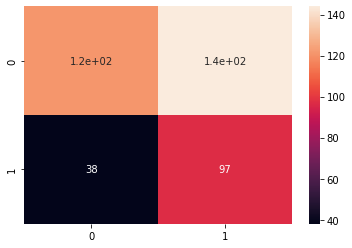

In [101]:
from sklearn.metrics import confusion_matrix
C=confusion_matrix(list(y_test), list(test_predict), labels=[0,1])
df=pd.DataFrame(C,index=["0", "1"],columns=["0", "1"])
sns.heatmap(df,annot=True)

# Testing Data

In [57]:
from imblearn.over_sampling import RandomOverSampler
rus = RandomOverSampler(random_state=0)
X_resampled_FULL, y_resampled_FULL = rus.fit_resample(X, y)

In [58]:
# from imblearn.over_sampling import ADASYN
# adasyn = ADASYN(random_state=0)
# X_resampled_FULL, y_resampled_FULL = adasyn.fit_resample(X, y)

In [68]:
from sklearn.linear_model import LogisticRegression
# define log
clf = LogisticRegression(max_iter=100)

clf.fit(X_resampled_FULL, y_resampled_FULL)

LogisticRegression()

I forget which parameter setting I used to submit to the Kaggle

clf_xgb = XGBClassifier(colsample_bytree = 0.6, learning_rate = 0.1, max_depth= 3, subsample = 0.9, n_estimators = 100)

or

clf_xgb = XGBClassifier(colsample_bytree = 0.8, learning_rate = 0.05, max_depth= 3, subsample = 0.4, n_estimators = 100)

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier

from sklearn.ensemble import VotingClassifier

clf_log = LogisticRegression(max_iter=100,C=159,penalty='l2')
clf_svm_p = SVC(C=1000, gamma=1, kernel= 'rbf',probability=True)
# clf_xgb = XGBClassifier(colsample_bytree = 0.6, learning_rate = 0.1, max_depth= 3, subsample = 0.9, n_estimators = 100)
clf_xgb = XGBClassifier(colsample_bytree = 0.8, learning_rate = 0.05, max_depth= 3, subsample = 0.4, n_estimators = 100)

clf = VotingClassifier(
    estimators=[('logistic', clf_log),
                ('svm', clf_svm_p), 
                ('xgboost', clf_xgb)],
    voting='soft', weights=[1, 2, 2])

clf.fit(X_resampled_FULL, y_resampled_FULL)

[20:24:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('logistic', LogisticRegression(C=159)),
                             ('svm', SVC(C=1000, gamma=1, probability=True)),
                             ('xgboost',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=0.05,
                                            max_delta_step=None, max_depth=3,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,


In [46]:
Z = Test_data.drop(['ID','SPENDING'], axis=1)

LOG_AGE = np.log(Z['AGE'])
LOG_AGE[np.isinf(LOG_AGE)] = np.nan
LOG_AGE = LOG_AGE.mask(LOG_AGE<0, np.mean(LOG_AGE))
# LOG_AGE = LOG_AGE.replace(-inf, np.mean(LOG_AGE))
LOG_AGE[np.isnan(LOG_AGE)] = np.mean(LOG_AGE)

LOG_ACADMOS = np.log(Z['ACADMOS'])
LOG_ACADMOS[np.isinf(LOG_ACADMOS)] = np.nan
LOG_ACADMOS = LOG_ACADMOS.mask(LOG_ACADMOS<0, np.mean(LOG_ACADMOS))
# LOG_AGE = LOG_AGE.replace(-inf, np.mean(LOG_AGE))
LOG_ACADMOS[np.isnan(LOG_ACADMOS)] = np.mean(LOG_ACADMOS)

LOG_INCOME = np.log(Z['INCOME'])
LOG_INCOME[np.isinf(LOG_INCOME)] = np.nan
LOG_INCOME = LOG_INCOME.mask(LOG_INCOME<0, np.mean(LOG_INCOME))
# LOG_AGE = LOG_AGE.replace(-inf, np.mean(LOG_AGE))
LOG_INCOME[np.isnan(LOG_INCOME)] = np.mean(LOG_INCOME)

LOG_INCPER = np.log(Z['INCPER'])
LOG_INCPER[np.isinf(LOG_INCPER)] = np.nan
LOG_INCPER = LOG_INCPER.mask(LOG_INCPER<0, np.mean(LOG_INCPER))
# LOG_AGE = LOG_AGE.replace(-inf, np.mean(LOG_AGE))
LOG_INCPER[np.isnan(LOG_INCPER)] = np.mean(LOG_INCPER)

LOG_EXP_INC = np.log(Z['EXP_INC'])
LOG_EXP_INC[np.isinf(LOG_EXP_INC)] = np.nan
LOG_EXP_INC = LOG_EXP_INC.mask(LOG_EXP_INC<0, np.mean(LOG_EXP_INC))
# LOG_AGE = LOG_AGE.replace(-inf, np.mean(LOG_AGE))
LOG_EXP_INC[np.isnan(LOG_EXP_INC)] = np.mean(LOG_EXP_INC)

Z['LOG_AGE'] = LOG_AGE
Z['LOG_ACADMOS'] = LOG_ACADMOS
Z['LOG_INCOME'] = LOG_INCOME
Z['LOG_INCPER'] = LOG_INCPER
Z['LOG_EXP_INC'] = LOG_EXP_INC

Z = Z.drop(['AGE','ACADMOS', 'INCOME', 'INCPER', 'EXP_INC'], axis=1)

from sklearn import preprocessing
mm = preprocessing.MinMaxScaler()
Z = mm.fit_transform(Z)

Predict_result = clf.predict(Z)

# Output the prediction result

In [47]:
ID = range(0,1000)

Result = pd.DataFrame({'ID':ID,'DEFAULT':Predict_result})

In [48]:
Result.to_csv("Result of Log.csv",index=False)